<a href="https://colab.research.google.com/github/osongo-Geoffrey/PREDICTING-PREMIUM-INSUARNCE-COVER-USING-LINEAR-REGRESSION/blob/main/MP1_Osongo_Geoffrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING PREMIUM INSUARNCE COVER USING LINEAR REGRESSION**

In the competitive insurance industry, accurate premium pricing is crucial for maintaining profitability while attracting and retaining customers. Insurance companies must balance the need to cover potential claims and operational costs with the imperative to offer competitive rates that don't drive customers to competitors. The challenge lies in developing a robust predictive model that can accurately estimate individual insurance charges based on customer characteristics, enabling insurers to make data-driven pricing decisions that reflect actual risk levels.

This project implements a linear regression model to predict insurance premium charges using various customer attributes including age,sex, BMI, number of children, smoking status, and geographic region. Linear regression is particularly well-suited for this problem because insurance charges represent a continuous numerical target variable, and the algorithm's inherent interpretability allows stakeholders to understand exactly how each factor contributes to premium calculations.Linear regression provides transparent coefficients that can be easily explained to regulators, customers, and business decision-makers.

Through this analysis, the aim is to identify the most significant predictors of insurance costs, quantify the impact of lifestyle factors such as smoking on premium pricing, and develop insights that can inform both pricing strategies and risk assessment protocols. Additionally, I seek to understand regional variations in insurance costs and evaluate whether current pricing models adequately reflect the relationship between customer demographics and actual insurance charges. The ultimate goal is to create a reliable, interpretable model that can support fair and accurate premium pricing while providing actionable insights for business strategy and risk management decisions.



Importing the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Library for normalizing the data
from sklearn.linear_model import LinearRegression #Library for training my model
from sklearn.metrics import mean_squared_error, r2_score #Library for evaluating the model

Loading the data

In [ ]:
#This function enables you to select a file from your Computers storsge
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [ ]:
#Reading the csv file and dipslaying
insurance_cover=pd.read_csv('insurance.csv')
insurance_cover.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 Dataset Overview


Data description

In [ ]:
#Visualizing the data
insurance_cover.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Getting the infomationthe number of columns and rows
print('The  dimesnsions dataset',insurance_cover.shape)

The  dimesnsions dataset (1338, 7)


In [ ]:
#Features descriotions and datatypes
insurance_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_cover.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data visualization

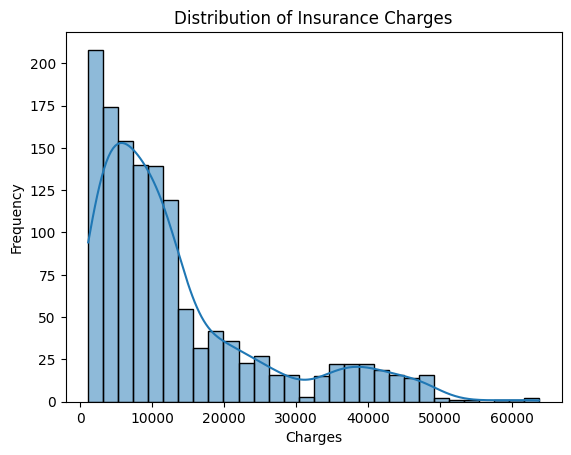

In [ ]:
#Initial Observations About the Target Variable
sns.histplot(insurance_cover['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


Scatter  plots for each variables

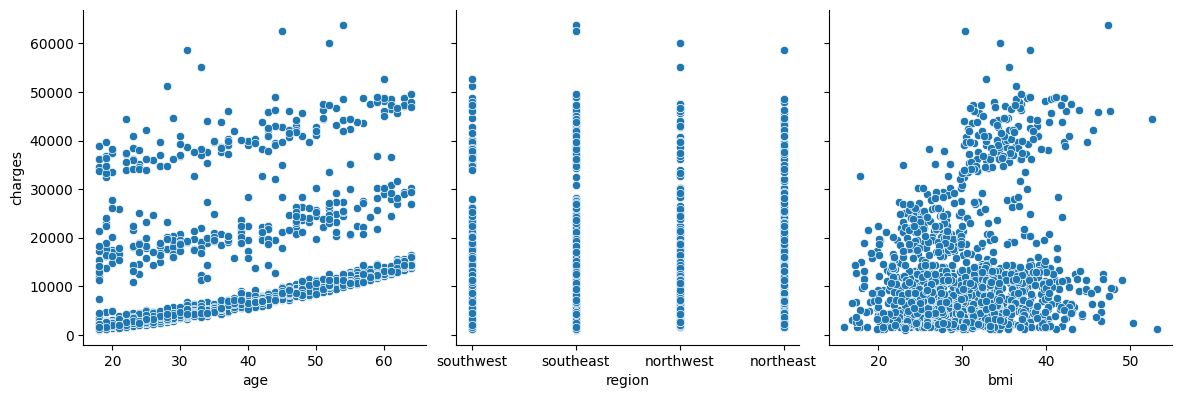

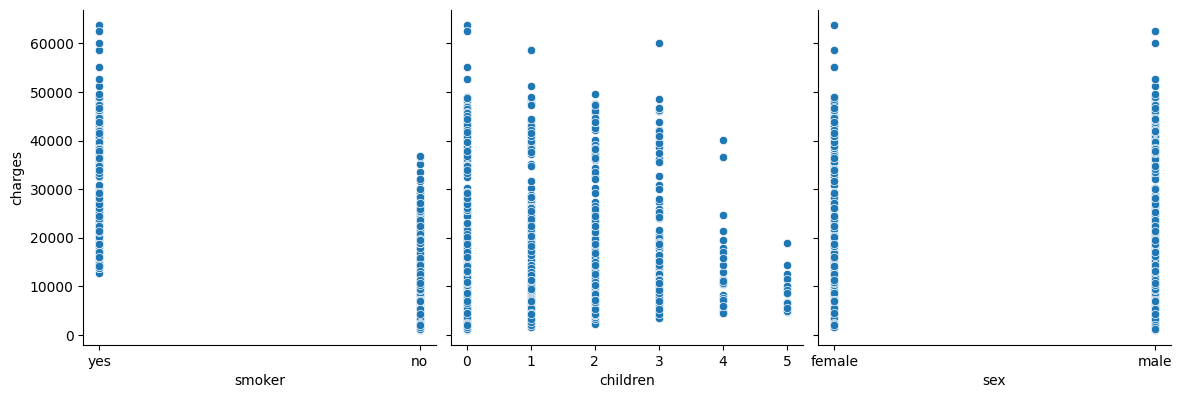

In [ ]:
# Create scatter plots to visualize relationships between numerical/categorical features and the target variable 'charges'

# Plot age, region, and BMI against charges to observe any visible trends or patterns
sns.pairplot(insurance_cover, x_vars=['age', 'region', 'bmi'], y_vars='charges', height=4, kind='scatter')

# Plot smoker status, number of children, and sex against charges to examine how these features relate to insurance cost
sns.pairplot(insurance_cover, x_vars=['smoker', 'children', 'sex'], y_vars='charges', height=4, kind='scatter')

# Display the plots
plt.show()

Data preprosesing

In [ ]:
#Checking for missing values in the data
insurance_cover.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#Checking for duplicates in the data
print('The number duplicated rows are: ', insurance_cover.duplicated().sum())

The number duplicated rows are:  1


In [ ]:
#Checking for duplicates in the data
print('The number duplicated rows are: ', insurance_cover.duplicated().sum())

Encoding the data


In [ ]:
#Encoding the data
insurance_cover_encoded=pd.get_dummies(insurance_cover,columns=['sex', 'region', 'smoker'],drop_first=True)

Spliting the features and target

In [ ]:
X=insurance_cover_encoded.drop('charges',axis=1)
y=insurance_cover_encoded['charges']

#Splitting the data for training and testing the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Normalizing the data, all the columns

In [ ]:
scaler=StandardScaler()

# Normalize the training data (fit and transform)
X_train_scaled=scaler.fit_transform(X_train)

# Normalize the training data (fit and transform)
X_test_scaled=scaler.fit_transform(X_test)

Training the model now

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LinearRegression()

Evaluating the model

In [ ]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Import evaluation metrics
from sklearn.metrics import r2_score as r2_func, mean_squared_error

# Calculate R² score and Mean Squared Error (MSE)
r2 = r2_func(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the evaluation results
print(f"R² Score: {r2:.4f}")  # Indicates how well the model explains variance (1.0 = perfect fit)
print(f"Mean Squared Error: {mse:.4f}")  # Measures the average squared difference between actual and predicted values


R² Score: 0.7736
Mean Squared Error: 38740781.4033


 Visualizing the predictions vs. actual

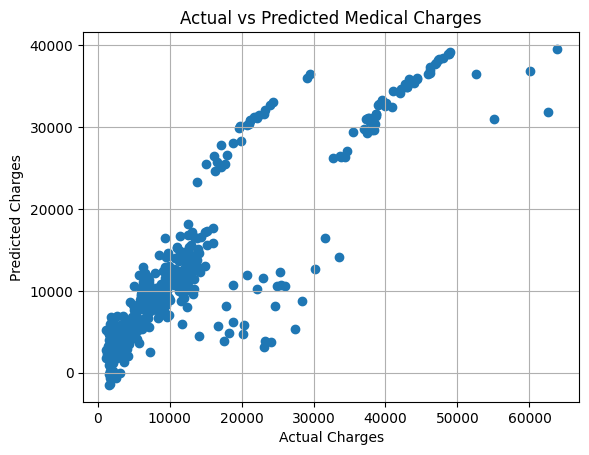

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True)
plt.show()